# 시계열 기초
- 단변수 예측
- 데이터 합성
- split 함수
- 시각화 함수

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%config InlineBackend.figure_format = 'retina'

## 데이터 생성

In [2]:
np.pi

3.141592653589793

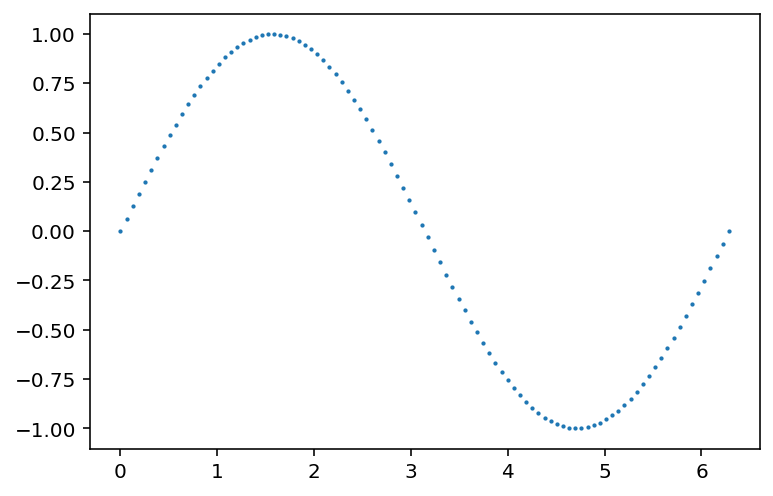

In [3]:
xs = np.linspace(0,2*np.pi,100)
plt.scatter(xs, np.sin(xs), marker ='.', s=5)

1440


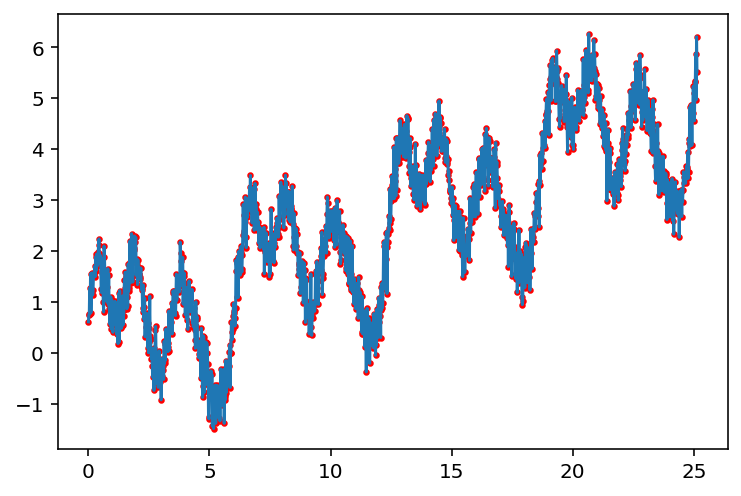

In [4]:
years = 4
n_samples = 12*30* years; print(n_samples)
xs = np.linspace(0,years*2*np.pi,n_samples)
ys = np.sin(xs)  + 0.8*np.sin(2*xs) + 0.2*xs \
     + 0.7*np.cos(3*xs)+ 0.4*np.sin(4*xs) \
     + 0.3* np.random.randn(n_samples)
plt.scatter(xs, ys, c='r', s=5)
plt.plot(xs, ys)

## 훈련데이터, 검증 데이터 나누기 (cut=0.7)

In [5]:
cut = np.int((n_samples*0.7))
train = ys[:cut]
test = ys[cut:]
ys.shape, train.shape, test.shape, cut

((1440,), (1007,), (433,), 1007)

##  x - y 데이터 나누는 함수 정의

In [6]:
def split_seq(sequence, n_steps):
    x, y = [], []
    for i in range(len(sequence)):
        if i > len(sequence) - n_steps - 1 : break
        x.append(sequence[i:i+n_steps])
        y.append(sequence[i+n_steps])
    return np.array(x), np.array(y)

In [7]:
def split_seq_2(sequence, n_steps_in, n_steps_out):
  x, y = [],[]
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    if out_end_ix > len(sequence):
        break
    seq_x, seq_y = sequence[i:end_ix], sequence[out_end_ix-1]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x), np.array(y)

In [18]:
data = [1,2,3,4,5,6,7,8,9,10]
n_steps_in, n_steps_out = 3, 1
x, y = split_seq_2(data, n_steps_in, n_steps_out)
for i in range(len(x)):
  print(x[i], y[i])

[1 2 3] 4
[2 3 4] 5
[3 4 5] 6
[4 5 6] 7
[5 6 7] 8
[6 7 8] 9
[7 8 9] 10


# 시각화 정의
- 예측치 비교

In [9]:
# 실제값과 예측치 비교
def plot_y_pred(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test, c='r')
    plt.plot(y_pred, c='b')
    plt.show()
    print("R2=", r2_score(y_test, y_pred).round(3))
    error = abs(y_test - y_pred)
    print("MAE=", error.mean().round(3))
    print("rmse=", np.sqrt((error**2).mean()).round(3))
    print("max=", max(error).round(3))

In [10]:
def scatter_errors(y_test, y_pred):
    error = abs(y_test - y_pred)
    plt.scatter(y_test, error, s=2)

# 단변수 예측
## 선형모델, 최적 n_steps 찾기

In [11]:
lr= LinearRegression()
for n_steps in range(1,10):
  x_train, y_train = split_seq(train, n_steps)
  x_test, y_test = split_seq(test, n_steps)
  lr.fit(x_train, y_train) 
  print(n_steps, lr.score(x_test, y_test).round(3))

1 0.856
2 0.892
3 0.898
4 0.901
5 0.902
6 0.902
7 0.901
8 0.9
9 0.899


## 최적 스텝수

0.9020058589205846


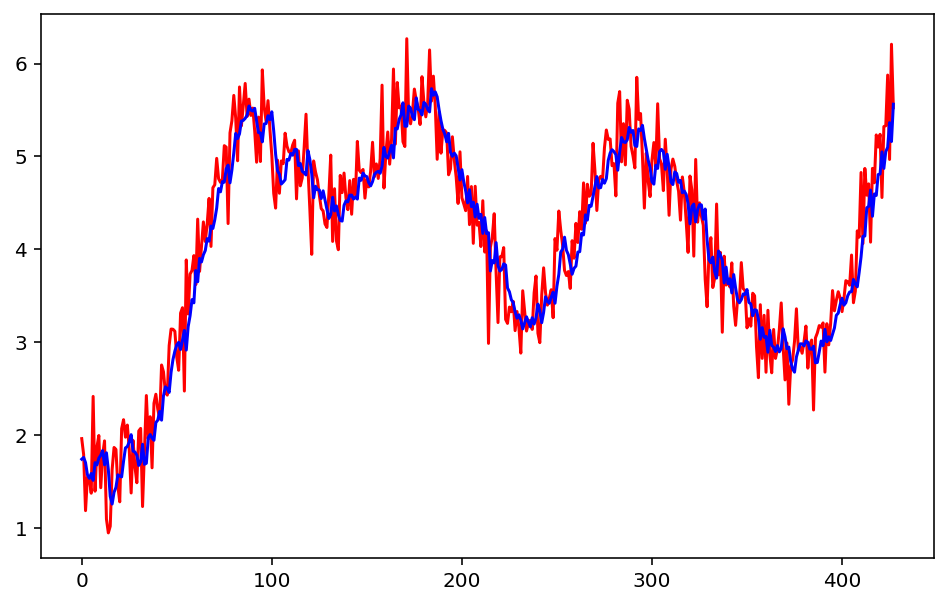

In [12]:
n_steps = 5
x_train, y_train = split_seq(train, n_steps)
x_test, y_test = split_seq(test, n_steps)

lr.fit(x_train, y_train) 
print(lr.score(x_test, y_test))
y_pred = lr.predict(x_test)
plot_y_pred(y_test, y_pred)

In [13]:
lr.coef_, lr.intercept_

(array([0.18905835, 0.08988654, 0.17691515, 0.23207118, 0.2991658 ]),
 0.02750485096853872)

MAE= 0.284
rmse= 0.358
max= 1.193


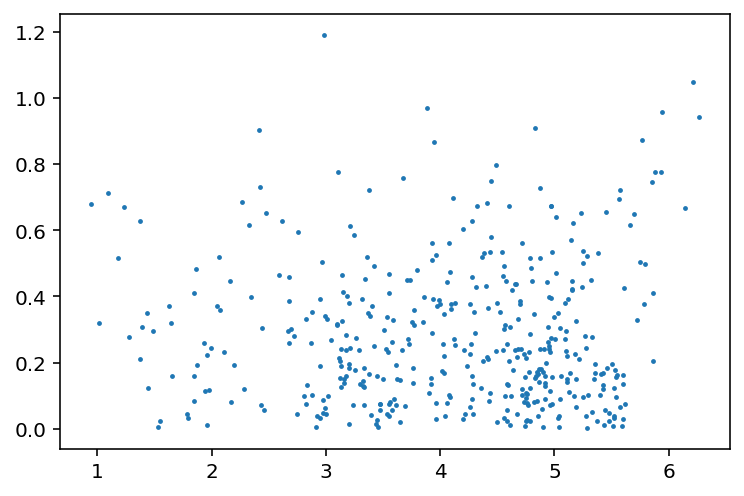

In [14]:
scatter_errors(y_test, y_pred)

# 미래 예측

In [15]:
lr = LinearRegression()
n_steps_in = 2
n_futures = range(10)
for n_steps_out in n_futures:
  x_train, y_train = split_seq_2(train, n_steps_in, n_steps_out)
  x_test, y_test = split_seq_2(test, n_steps_in, n_steps_out)
  lr.fit(x_train, y_train) 
  print(n_steps_out, ',', lr.score(x_test, y_test).round(3))

0 , 1.0
1 , 0.892
2 , 0.88
3 , 0.868
4 , 0.86
5 , 0.847
6 , 0.824
7 , 0.801
8 , 0.779
9 , 0.749


## 스텝수 선택 in, out

3 , 0.878


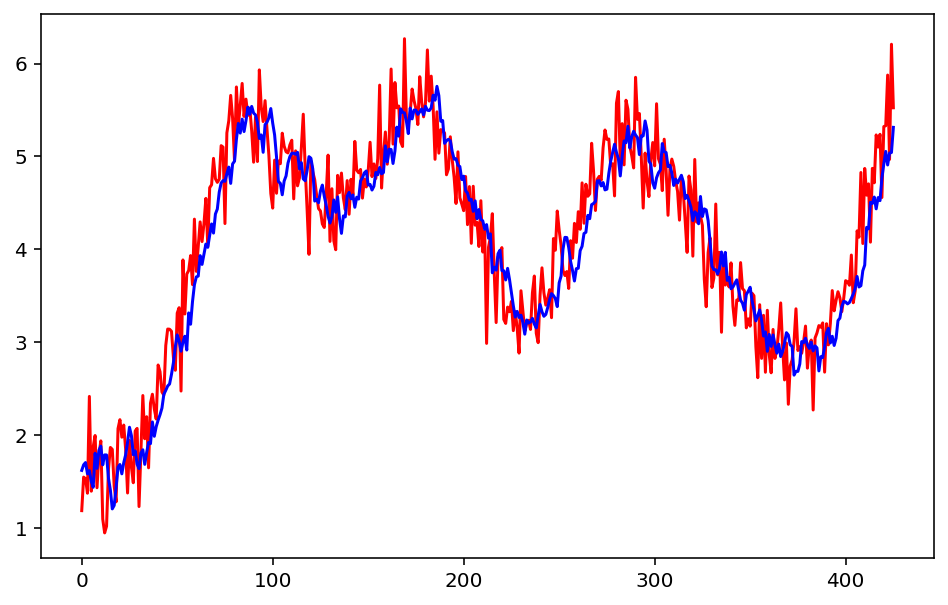

In [16]:
n_steps_in = 5
n_steps_out = 3
x_train, y_train = split_seq_2(train, n_steps_in, n_steps_out)
x_test, y_test = split_seq_2(test, n_steps_in, n_steps_out)
lr.fit(x_train, y_train) 
print(n_steps_out, ',', lr.score(x_test, y_test).round(3))
y_pred = lr.predict(x_test)
plot_y_pred(y_test, y_pred)

MAE= 0.315
rmse= 0.396
max= 1.28


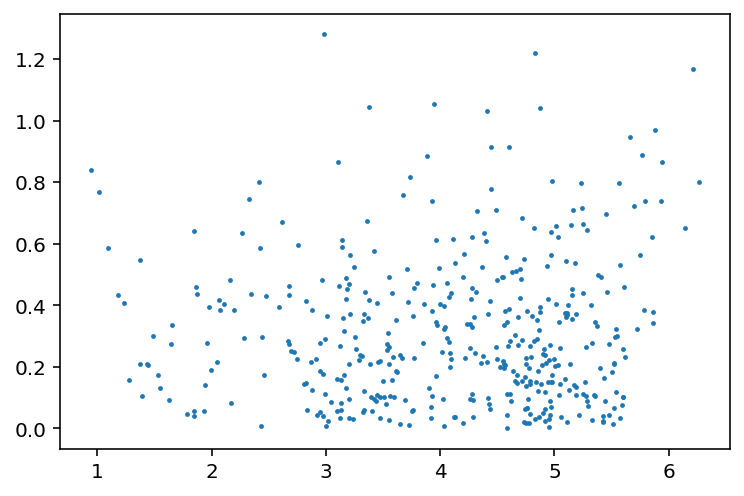

In [17]:
scatter_errors(y_test, y_pred)